#Clustering II

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Load Datasets

In [ ]:
flame = pd.read_csv('flame.txt', header=None, sep='\t')
flame = flame.drop(2,axis=1)

In [ ]:
compound = pd.read_csv('compound.txt', header=None, sep='\t')
compound = compound.drop(2,axis=1)

In [ ]:
spiral = pd.read_csv('spiral.txt', header=None, sep='\t')
spiral = spiral.drop(2,axis=1)

In [ ]:
pathbased = pd.read_csv('pathbased.txt', header=None, sep='\t')
pathbased = pathbased.drop(2,axis=1)

## Part I - k-means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
def plot_kmeans(dfs):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,5))
    axe = axes.ravel()
    for i in range(len(dfs)):
        df = dfs[i]
        df.plot.scatter(x=0,y=1,c='Cluster ID',colormap='jet',ax=axe[i])
        title = f'K={i+2}'
        axe[i].set_title(title)
    fig.tight_layout()

### Flame

In [ ]:
# create k-means model for various ks and calculate SSE + results for plotting
numClusters = [2,3,4,5,6]
SSE = []
results = []
for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(flame)
    SSE.append(k_means.inertia_)
    labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
    result = pd.concat((flame,labels),axis=1)
    results.append(result)

Text(0, 0.5, 'SSE')

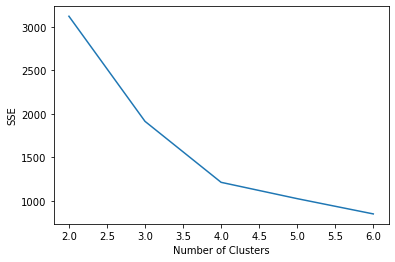

In [ ]:
# plot SSE vs k
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

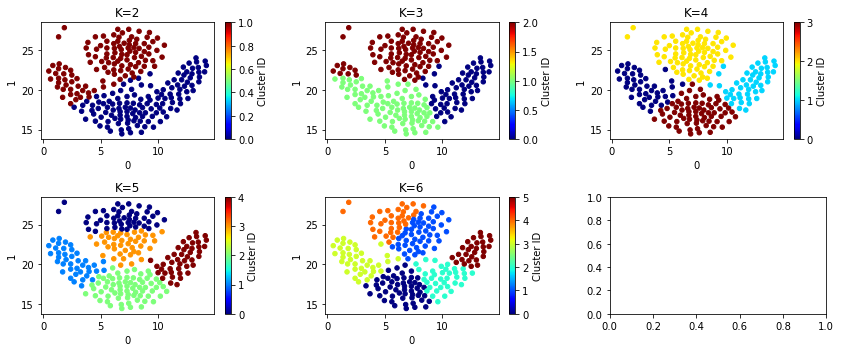

In [ ]:
plot_kmeans(results)

Here we see that we get better and better clusters until k=4. The clusters are not perfect at K=4 but there is a decent split. K=5 and K=6 have some decent splits but it is starting to get uneccesary at that point. The SSE plot shows a large jump between clusters 2 and 3 but they are both pretty bad clusters. The jump between 3 and 4 has a smaller change on the SSE but out of all the changes it is the best one.

### Compound

In [ ]:
# create k-means model for various ks and calculate SSE + results for plotting
numClusters = [2,3,4,5,6]
SSE = []
results = []
for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(compound)
    SSE.append(k_means.inertia_)
    labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
    result = pd.concat((compound,labels),axis=1)
    results.append(result)

Text(0, 0.5, 'SSE')

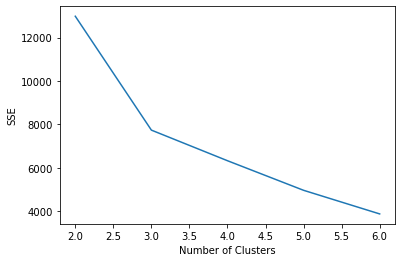

In [ ]:
# plot SSE vs k
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

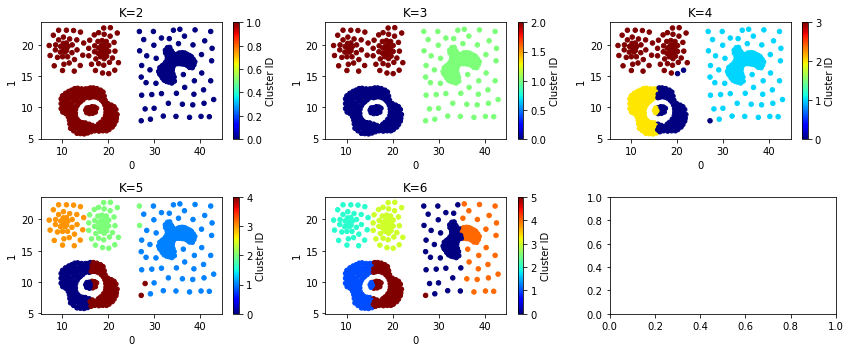

In [ ]:
plot_kmeans(results)

The SSE plot shows a large jump between 2 and 3 (as expected) and from then out is fairly gradual with the smallest change being between 5 and 6 (also as expected). In terms of quality of the clusters, k=3 or k=5 is probably the best. There are 3 general regions on the screen that have clusters within them and k=3 breaks that up well but it fails to capture the smaller clusters. k=5 starts to get into the smaller clusters without being as innacurate as k=6.

### Spiral

In [ ]:
# create k-means model for various ks and calculate SSE + results for plotting
numClusters = [2,3,4,5,6]
SSE = []
results = []
for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(spiral)
    SSE.append(k_means.inertia_)
    labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
    result = pd.concat((spiral,labels),axis=1)
    results.append(result)

Text(0, 0.5, 'SSE')

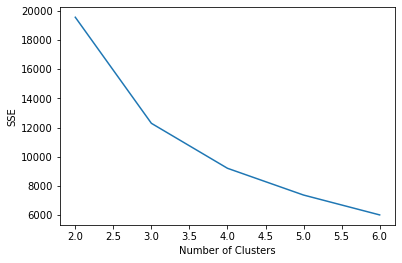

In [ ]:
# plot SSE vs k
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

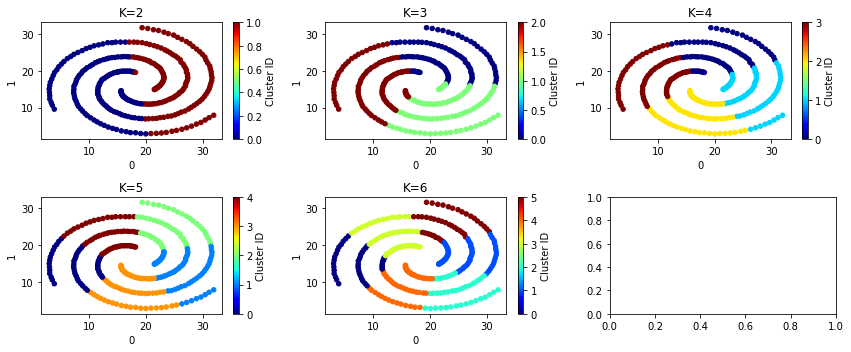

In [ ]:
plot_kmeans(results)

The SSE plot is really unhelpful for measuring quality of the clusters for the spiral dataset because all the clusterings are bad. This is just due to the shape of the data. Anything past k=3 or maybe k=4 here seems too useless.

### Pathbased

In [ ]:
# create k-means model for various ks and calculate SSE + results for plotting
numClusters = [2,3,4,5,6]
SSE = []
results = []
for k in numClusters:
    k_means = KMeans(n_clusters=k)
    k_means.fit(pathbased)
    SSE.append(k_means.inertia_)
    labels = pd.DataFrame(k_means.labels_, columns=['Cluster ID'])
    result = pd.concat((pathbased,labels),axis=1)
    results.append(result)

Text(0, 0.5, 'SSE')

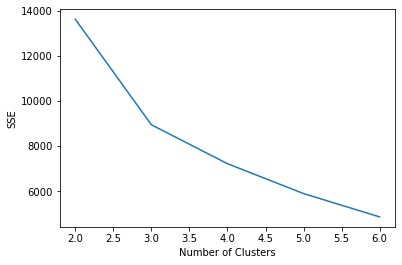

In [ ]:
# plot SSE vs k
plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

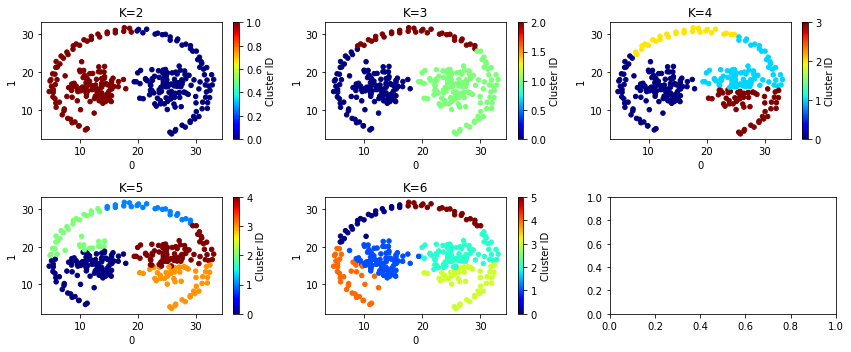

In [ ]:
plot_kmeans(results)

The SSE plot for this dataset tells the same story as all the other ones. It really goes to show how unreliable SSE is as a measure for the quality of the clusters as if the clustering algorithm is not up to par for the task, then the SSE is going to be useless. Here we see K=3 is the best at clustering the data and anything past that starts to break the main two globular clusters which is bad.

## Part II - DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from scipy.spatial import distance_matrix

In [ ]:
# find k nearest neighbors for each point in X
def k_distances(X, k):
    # store the distance of the k nearest neighbors
    knn = []
    # create proximity matrix
    X = X.to_numpy()
    matrix = distance_matrix(X,X)
    # find k'th nearest neighbor
    for row in matrix:
        sorted_row = sorted(row)
        #ignore index 0 as it = 0
        knn.append(sorted_row[k])
    index = np.arange(0, len(knn), 1, dtype=int)
    knn = np.array(sorted(knn))
    result = np.column_stack((index,knn))
    # returns 2d numpy array [[0,distanc1],[1,distance2],...]
    return result

In [ ]:
def plot_dbscan(dfs, titles):
    fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(10,22))
    axe = axes.ravel()
    for i in range(len(results)):
        df = dfs[i]
        df.plot.scatter(x=0,y=1,c='Cluster ID',colormap='jet',ax=axe[i])
        title = titles[i]
        axe[i].set_title(title)
    fig.tight_layout()

### Flame

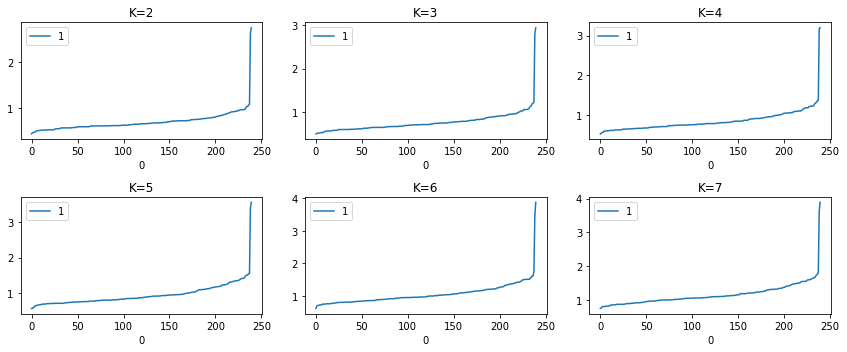

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,5))
axe = axes.ravel()
for i in range(6):
    # put resuilt of k_distances into dataframe so we can use the plot function
    k_distance = pd.DataFrame(k_distances(flame,i+2))
    k_distance.plot.line(x=0,y=1, ax=axe[i])
    title = f'K={i+2}'
    axe[i].set_title(title)
fig.tight_layout()

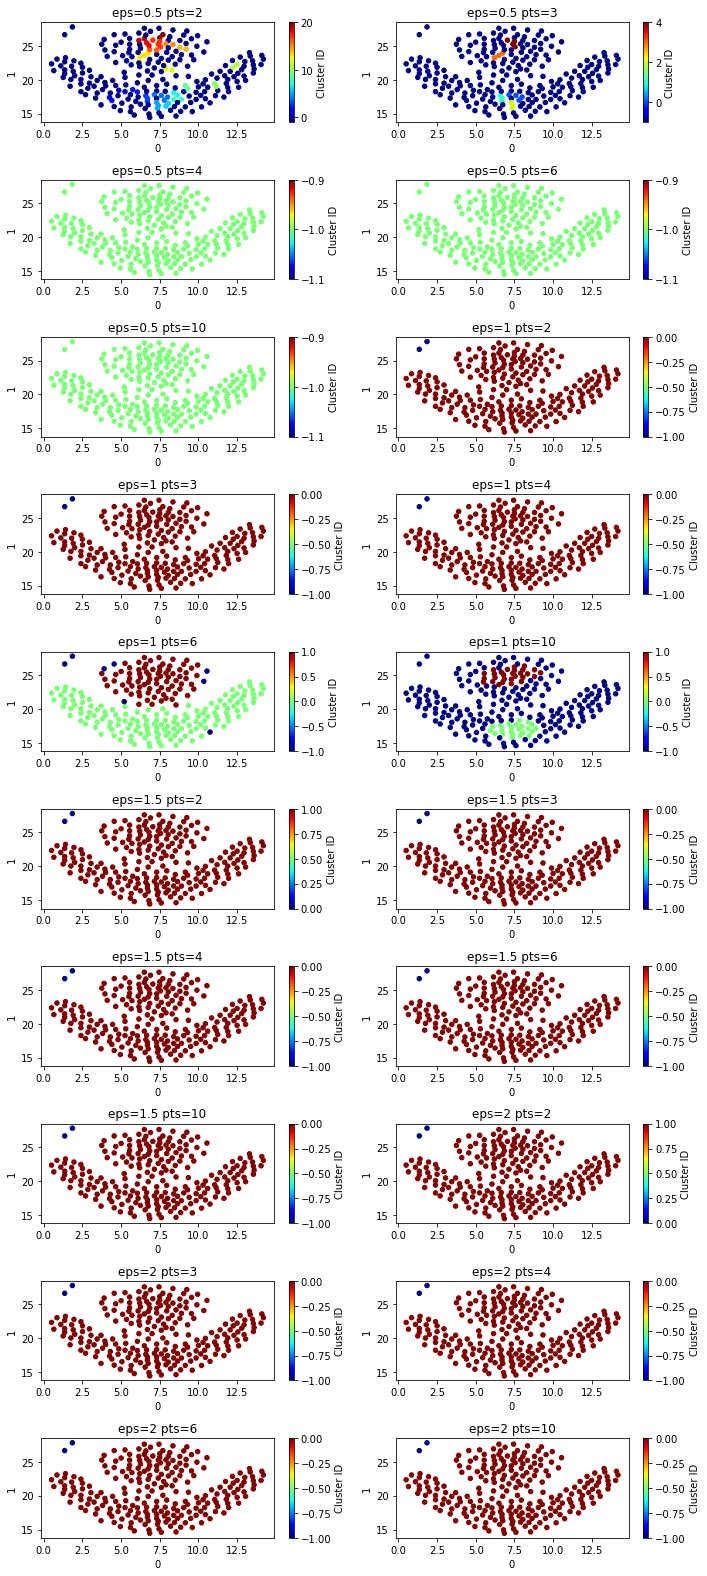

In [ ]:
# epsilon values are chosen from analyzing the above graphs
eps = [0.5,1,1.5,2]
minpts = [2,3,4,6,10]
results = []
titles = []
for i in range(len(eps)):
    for j in range(len(minpts)):
        db = DBSCAN(eps=eps[i], min_samples=minpts[j]).fit(flame)
        labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
        result = pd.concat((flame,labels),axis=1)
        results.append(result)
        titles.append(f'eps={eps[i]} pts={minpts[j]}')

plot_dbscan(results,titles)

<AxesSubplot:xlabel='0', ylabel='1'>

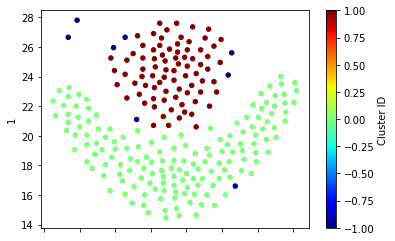

In [ ]:
# optimal settings
db = DBSCAN(eps=1, min_samples=6).fit(flame)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((flame,labels), axis=1)
result.plot.scatter(x=0,y=1,c='Cluster ID', colormap='jet')

### Compound

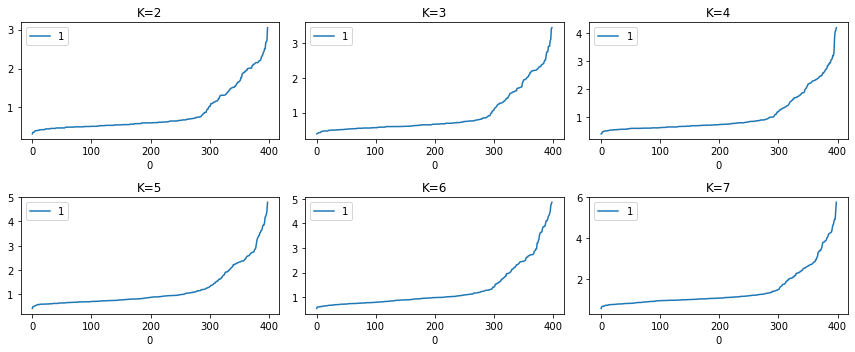

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,5))
axe = axes.ravel()
for i in range(6):
    k_distance = pd.DataFrame(k_distances(compound,i+2))
    k_distance.plot.line(x=0,y=1, ax=axe[i])
    title = f'K={i+2}'
    axe[i].set_title(title)
fig.tight_layout()

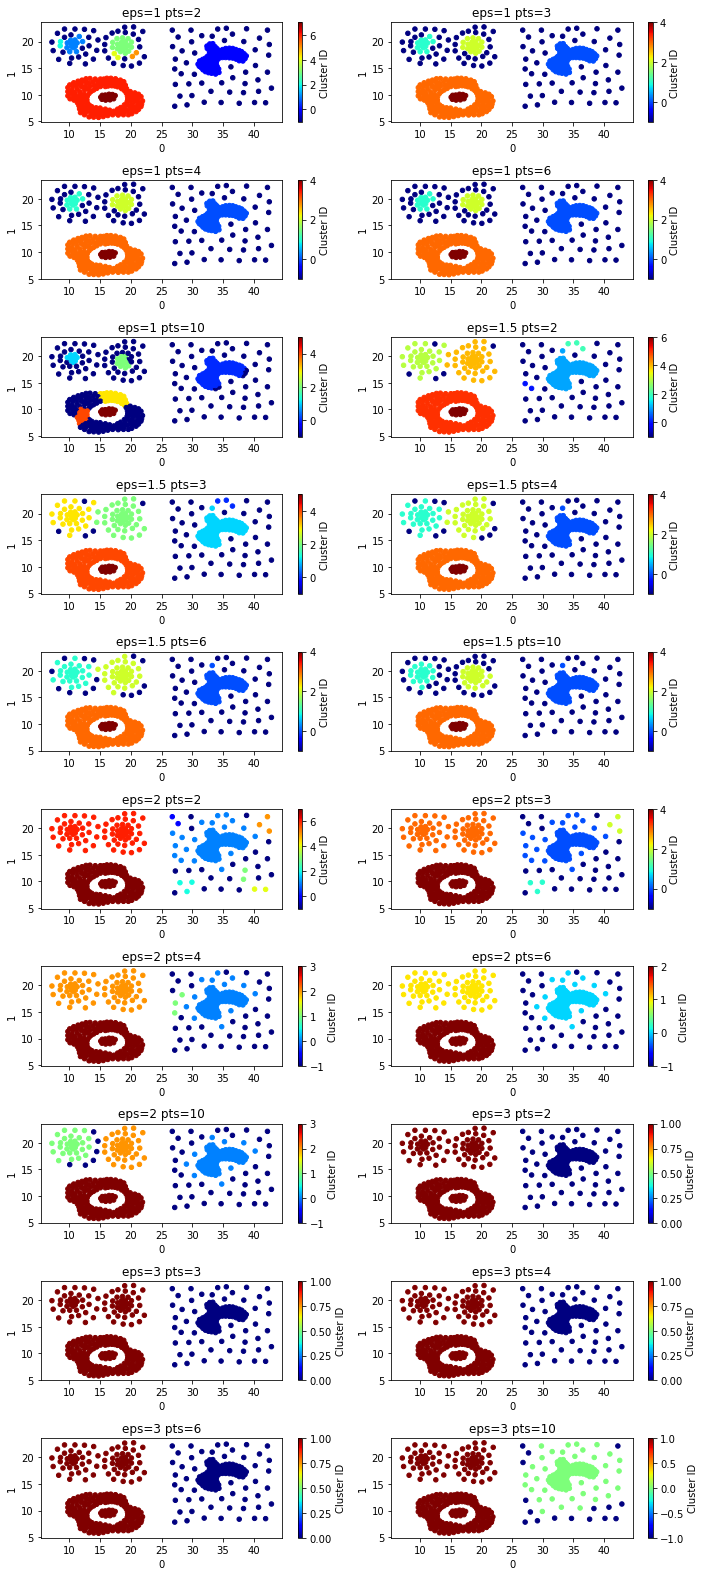

In [ ]:
# epsilon values are chosen from analyzing the above graphs
eps = [1,1.5,2,3]
minpts = [2,3,4,6,10]
results = []
titles = []
for i in range(len(eps)):
    for j in range(len(minpts)):
        db = DBSCAN(eps=eps[i], min_samples=minpts[j]).fit(compound)
        labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
        result = pd.concat((compound,labels),axis=1)
        results.append(result)
        titles.append(f'eps={eps[i]} pts={minpts[j]}')

plot_dbscan(results,titles)

<AxesSubplot:xlabel='0', ylabel='1'>

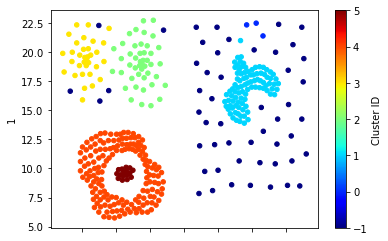

In [ ]:
#optimal
db = DBSCAN(eps=1.5, min_samples=3).fit(compound)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((compound,labels), axis=1)
result.plot.scatter(x=0,y=1,c='Cluster ID', colormap='jet')

### Spiral

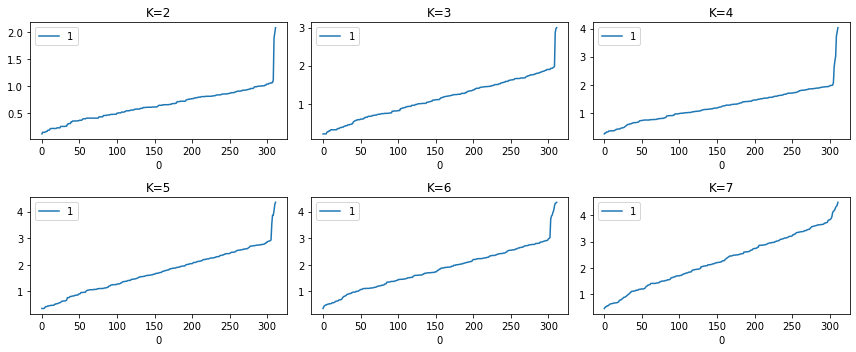

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,5))
axe = axes.ravel()
for i in range(6):
    k_distance = pd.DataFrame(k_distances(spiral,i+2))
    k_distance.plot.line(x=0,y=1, ax=axe[i])
    title = f'K={i+2}'
    axe[i].set_title(title)
fig.tight_layout()

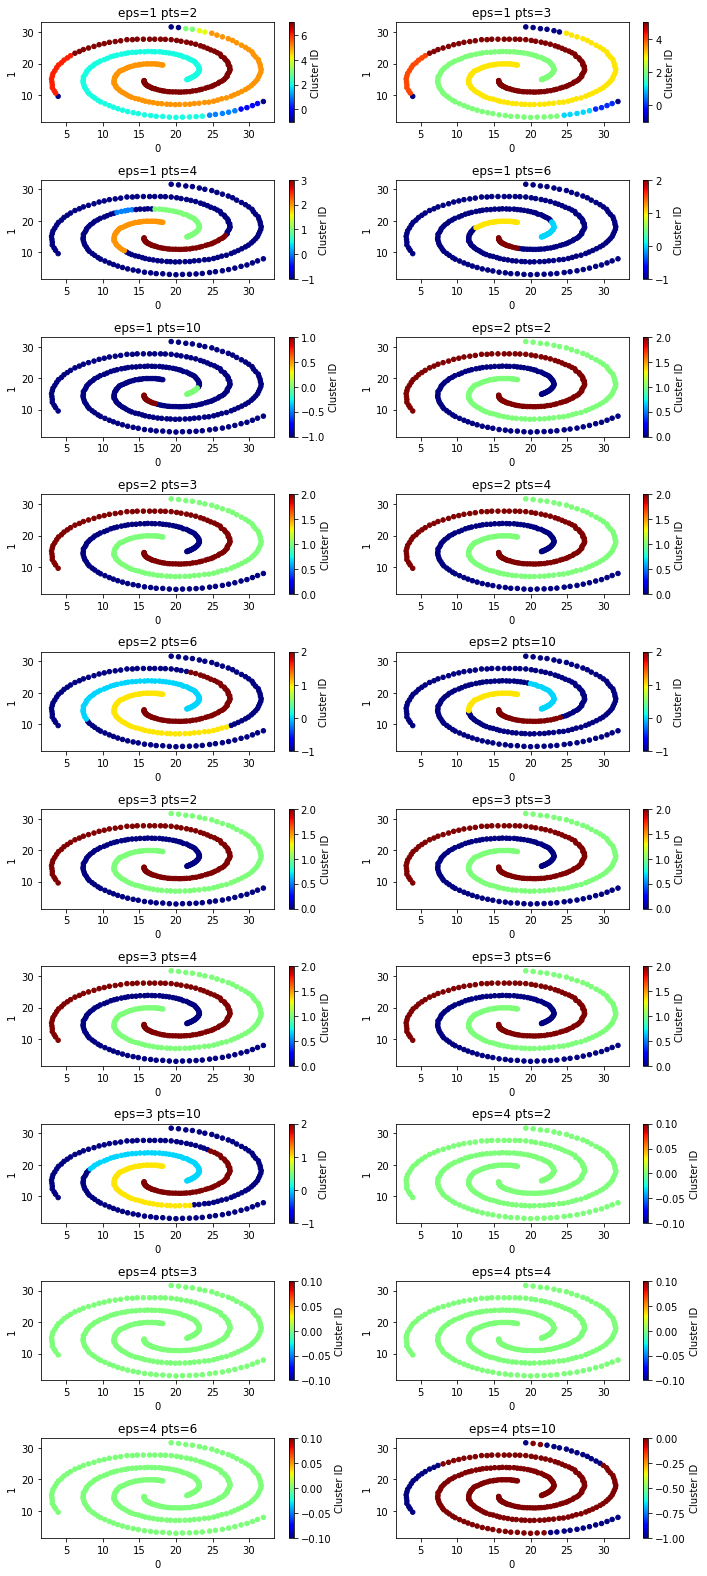

In [ ]:
# epsilon values are chosen from analyzing the above graphs
eps = [1,2,3,4]
minpts = [2,3,4,6,10]
results = []
titles = []
for i in range(len(eps)):
    for j in range(len(minpts)):
        db = DBSCAN(eps=eps[i], min_samples=minpts[j]).fit(spiral)
        labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
        result = pd.concat((spiral,labels),axis=1)
        results.append(result)
        titles.append(f'eps={eps[i]} pts={minpts[j]}')

plot_dbscan(results,titles)

<AxesSubplot:xlabel='0', ylabel='1'>

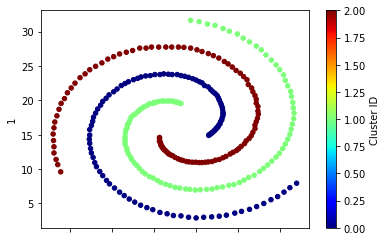

In [ ]:
# optimal
db = DBSCAN(eps=3, min_samples=4).fit(spiral)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((spiral,labels), axis=1)
result.plot.scatter(x=0,y=1,c='Cluster ID', colormap='jet')

### Pathbased

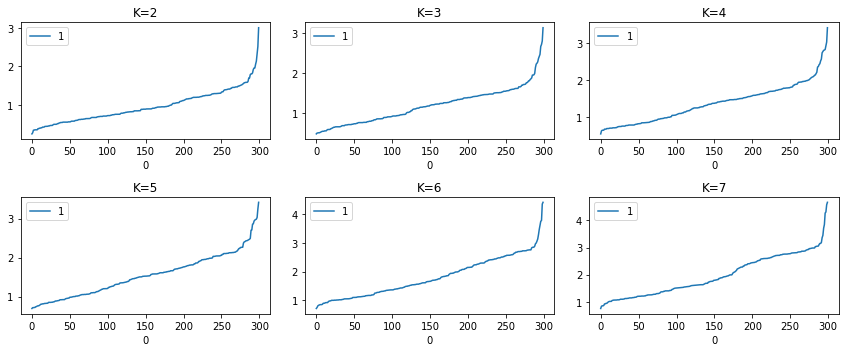

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,5))
axe = axes.ravel()
for i in range(6):
    k_distance = pd.DataFrame(k_distances(pathbased,i+2))
    k_distance.plot.line(x=0,y=1, ax=axe[i])
    title = f'K={i+2}'
    axe[i].set_title(title)
fig.tight_layout()

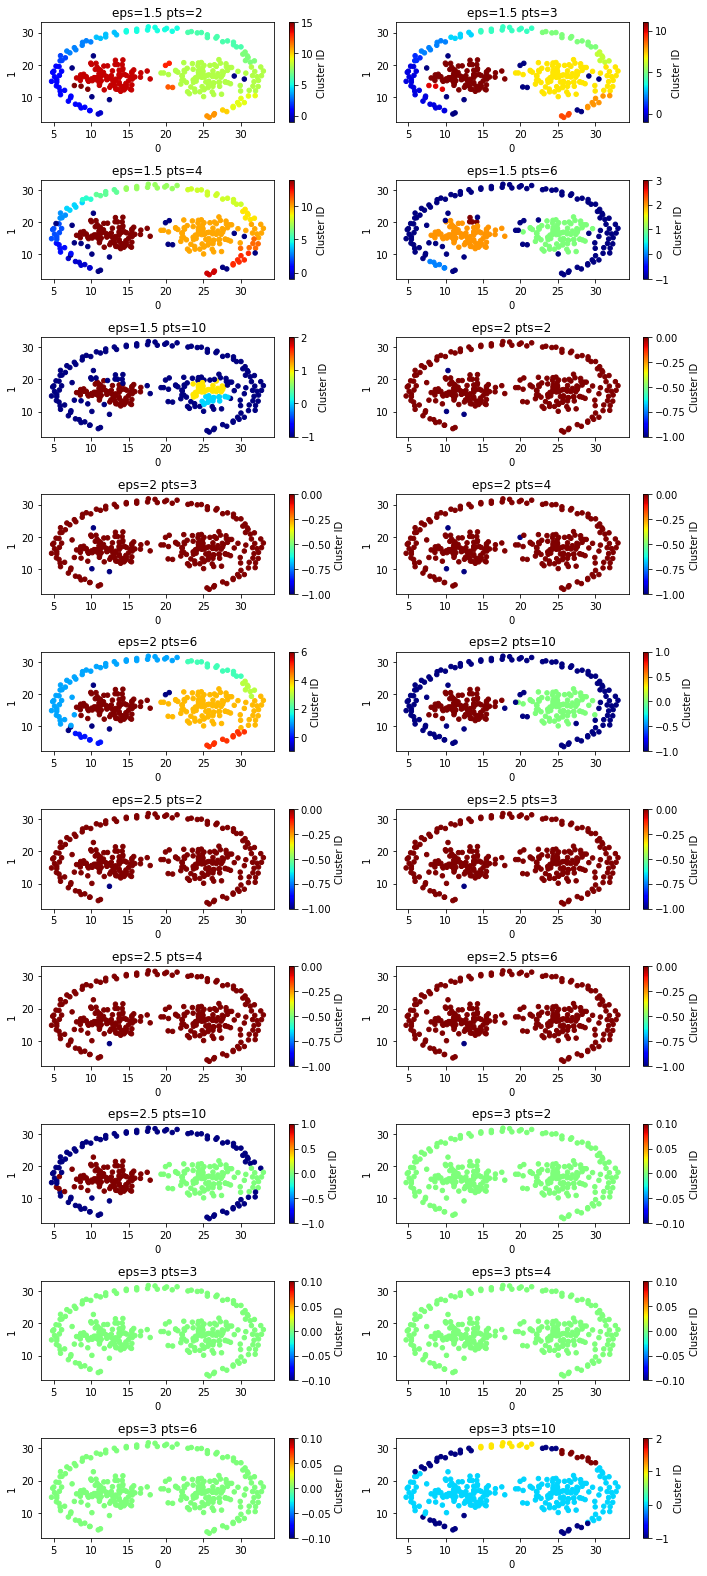

In [ ]:
# epsilon values are chosen from analyzing the above graphs
eps = [1.5,2,2.5,3]
minpts = [2,3,4,6,10]
results = []
titles = []
for i in range(len(eps)):
    for j in range(len(minpts)):
        db = DBSCAN(eps=eps[i], min_samples=minpts[j]).fit(pathbased)
        labels = pd.DataFrame(db.labels_, columns=['Cluster ID'])
        result = pd.concat((pathbased,labels),axis=1)
        results.append(result)
        titles.append(f'eps={eps[i]} pts={minpts[j]}')

plot_dbscan(results,titles)

<AxesSubplot:xlabel='0', ylabel='1'>

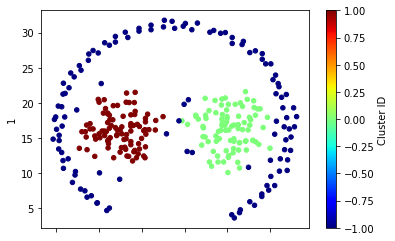

In [ ]:
# optimal
db = DBSCAN(eps=2, min_samples=10).fit(pathbased)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((pathbased,labels), axis=1)
result.plot.scatter(x=0,y=1,c='Cluster ID', colormap='jet')